A) Set a seed (to ensure work reproducibility) and take a random sample of  25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.


In [22]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the data
diabetes_db= pd.read_csv("/content/diabetes.csv")

# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample = diabetes_db.sample(n=25)

# Calculate mean and highest glucose values for sample and population
mean_gluc_sampl = round(sample['Glucose'].mean(),2)
print("Mean of Glucose Values for Sample: ", mean_gluc_sampl)
highest_gluc_sampl = sample['Glucose'].max()
print("Highest of Glucose Values for Sample: ", highest_gluc_sampl)
mean_gluc_pop = round(diabetes_db['Glucose'].mean(),2)
print("Mean of Glucose Values for Population: ", mean_gluc_pop)
highest_gluc_pop = diabetes_db['Glucose'].max()
print("Highest of Glucose Values for Population: ", highest_gluc_pop)

Mean of Glucose Values for Sample:  116.64
Highest of Glucose Values for Sample:  183
Mean of Glucose Values for Population:  120.89
Highest of Glucose Values for Population:  199


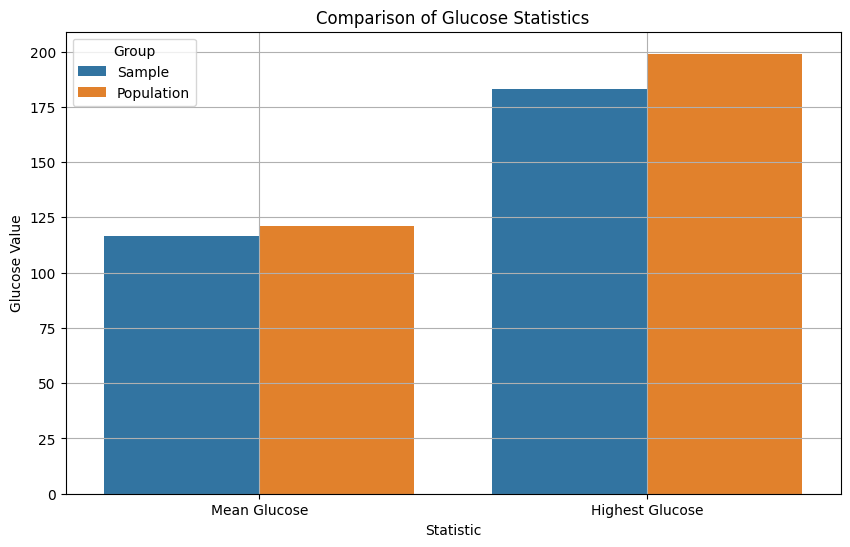

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the variables are already defined:
# sampl_mean_gluc, pop_mean_gluc, sampl_highest_gluc, pop_highest_gluc

# Create a DataFrame for plotting
data = {
    'Statistic': ['Mean Glucose', 'Highest Glucose'],
    'Sample': [mean_gluc_sampl, highest_gluc_sampl],
    'Population': [mean_gluc_pop, highest_gluc_pop]
}
df = pd.DataFrame(data)
df = pd.melt(df, id_vars="Statistic", var_name="Group", value_name="Glucose Value")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Statistic', y='Glucose Value', hue='Group', data=df)
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Value')
plt.grid(True)
plt.show()


B) Find the 98th percentile of BMI of your sample and the population and compare the results using charts

In [11]:
# Find the 98th percentile of BMI for sample and population
bmi_98th_percentile_sample = np.percentile(sample['BMI'], 98)
print("Sample 98th percentile BMI:", round(bmi_98th_percentile_sample, 2))
bmi_98th_percentile_pop = np.percentile(diabetes_db['BMI'], 98)
print("Population 98th percentile BMI:", round(bmi_98th_percentile_pop, 2))

Sample 98th percentile BMI: 40.25
Population 98th percentile BMI: 47.53


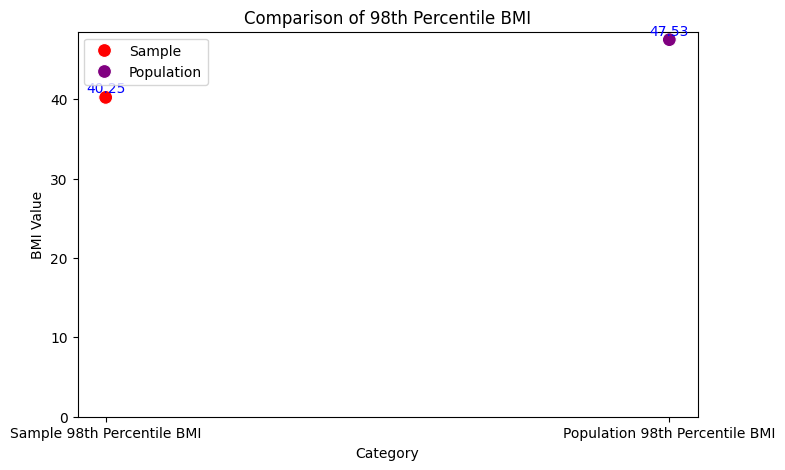

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data preparation
data = {
    'Category': ['Sample 98th Percentile BMI', 'Population 98th Percentile BMI'],
    'BMI Value': [bmi_98th_percentile_sample, bmi_98th_percentile_pop],
    'Group': ['Sample', 'Population']
}
DataFrame = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Category', y='BMI Value', hue='Group', data=DataFrame, s=100, palette=['red', 'purple'])

# Annotating values
for index, row in DataFrame.iterrows():
    plt.text(x=index, y=row['BMI Value'] + 0.2, s=f"{row['BMI Value']:.2f}",
             ha='center', va='bottom', fontsize=10, color='blue')

plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Value')
plt.legend(title=None)
plt.ylim(0, max(DataFrame['BMI Value']) + 1)  # Adjusting y-axis limits for better visualization
plt.show()


(C) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable.

In [33]:
def calculate_bootstrap_stats(data, num_botstrap_samples=500, botstrap_sample_size=150):
    botstrap_means = []
    botstrap_stds = []
    botstrap_mdians = []  # Renamed for clarity as it's actually the median being calculated

    for _ in range(num_botstrap_samples):
        botstrap_sampl = data.sample(n=botstrap_sample_size, replace=True)
        botstrap_means.append(botstrap_sampl['BloodPressure'].mean())
        botstrap_stds.append(botstrap_sampl['BloodPressure'].std())
        botstrap_mdians.append(np.percentile(botstrap_sampl['BloodPressure'], 50))  # Using median

    return botstrap_means, botstrap_stds, botstrap_medins

# Calculating bootstrap statistics
botstrap_means, botstrap_stds, botstrap_medins = calculate_bootstrap_stats(diabetes_db)

# Calculating population statistics
mean_blood_pressure_population = diabetes_db['BloodPressure'].mean()
print("Population Mean BP:", round(mean_blood_pressure_population, 2))
std_blood_pressure_population = diabetes_db['BloodPressure'].std()
print("Population Standard BP:", round(std_blood_pressure_population, 2))
median_blood_pressure_population = np.percentile(diabetes_db['BloodPressure'], 50)
print("Population Median BP:", round(median_blood_pressure_population, 2))

Population Mean BP: 69.11
Population Standard BP: 19.36
Population Median BP: 72.0


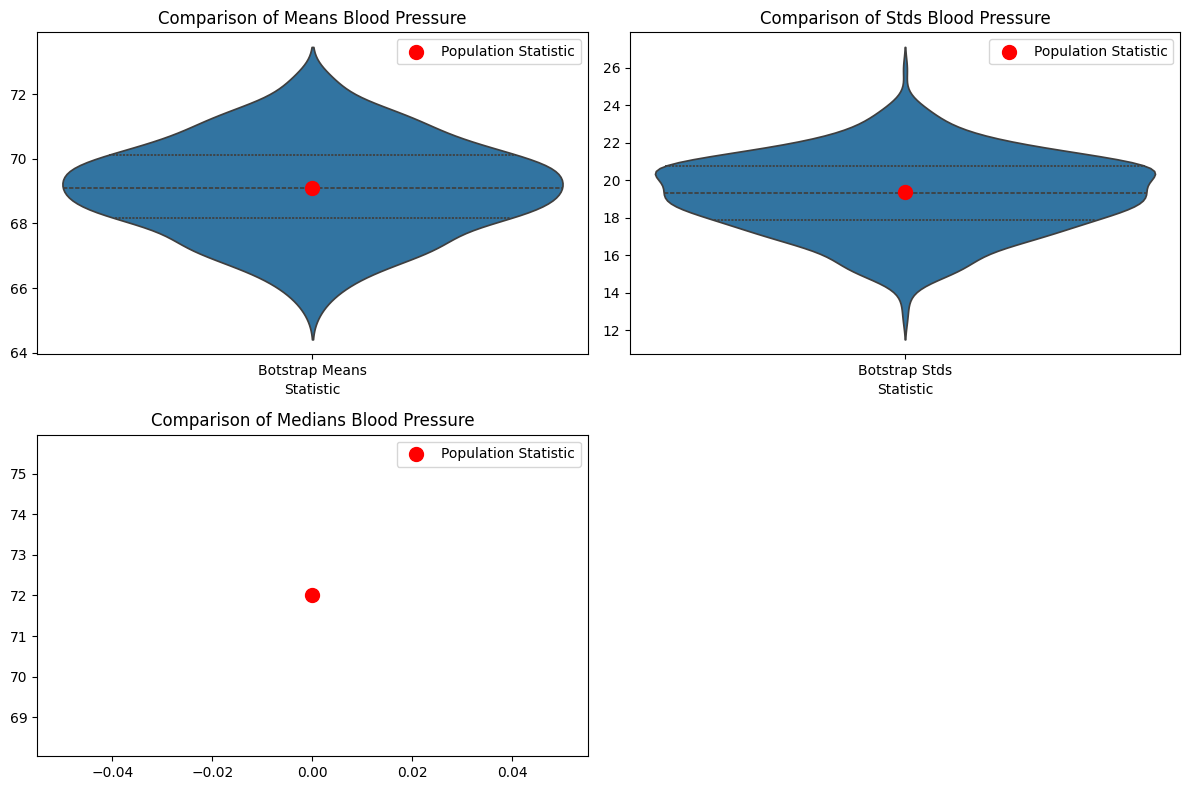

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preparing data for plotting
data = {
    'Botstrap Means': botstrap_means,
    'Botstrap Stds': botstrap_stds,
    'Botstrap Mdians': botstrap_medins  # Updated to reflect the correct statistic
}
df = pd.DataFrame(data)
df_melted = pd.melt(df, var_name='Statistic', value_name='Value')

# Population statistics for comparison
population_stats = {
    'Statistic': ['Botstrap Means', 'Botstrap Stds', 'Botstrap Mdians'],
    'Value': [mean_blood_pressure_population, std_blood_pressure_population, median_blood_pressure_population]
}
population_df = pd.DataFrame(population_stats)

# Plotting
plt.figure(figsize=(12, 8))

# Violin plot for each statistic
for i, stat in enumerate(['Botstrap Means', 'Botstrap Stds', 'Botstrap Medians'], 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Statistic', y='Value', data=df_melted[df_melted['Statistic'] == stat], inner='quartile')
    plt.scatter(x=0, y=population_df.loc[i-1, 'Value'], color='red', s=100, label='Population Statistic', zorder=5)
    plt.title(f'Comparison of {stat.split()[1]} Blood Pressure')
    plt.ylabel('')
    plt.legend()

plt.tight_layout()
plt.show()